# Makine Öğrenmesi-KNN

## 0 - Genel Import edilecek kütüphaneler

Not defterinde kullanılan tüm import aktarmaları en üstte bir yerde tek bir hücreye koymayı her zaman yararlı buluyorum. Bu şekilde, bu not defterinde kodu çalıştırmak için neyin gerekli olacağını söylemek kolaydır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 -   Pandas DataFrame'e Verileri Yükleme

Bir sonraki kod satırı, CSV dosyasını bir Pandas `DataFrame` nesnesine okuyacaktır, böylece onu mevcut Python oturumumuzda bulundurur ve onunla çalışabiliriz:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_iris = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## 2 - Bir NumPy Dizisine Özellikleri Alma

Son zamanlarda, scikit-learn gibi makine öğrenimi kitaplıkları Pandas DataFrame'leri desteklemeye başladı. Ancak geleneksel olarak NumPy dizileriyle çalışmak gelenekseldir. Aslında, DataFrame'ler NumPy dizilerinin üzerine inşa edilmiştir, bu nedenle NumPy dizileri biraz daha düşük seviyelidir. Btw. bir NumPy dizisini bir tensör olarak düşünebilirsiniz, NumPy dizileri olarak temsil edilen skalerler, vektörler, matrisler vb. olabilir.

Sonraki kod hücresinde, DataFrame'de gömülü olan NumPy dizisine .values özniteliği aracılığıyla erişiyoruz. Daha spesifik olarak, bir X değişkenine yalnızca 'PetalLength[cm]', 'PetalWidth[cm]' 2 özellik sütununu atadık. Burada X, 150x2 şeklinde NumPy dizisine başvurur (bunu bir matris olarak düşünebilirsiniz).

In [6]:
X = df_iris[['PetalLengthCm', 'PetalWidthCm']].values
print(X.shape)

(150, 2)


Sonraki hücre veri setindeki ilk 5 kaydı gösterir.

In [7]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 3 - Sınıf Etiketlerini Numpy Dizisine Aktarma

Nitelikleri yeni bir "X" değişkenine atamaya benzer şekilde, şimdi sınıf etiketlerini "y" olarak adlandıracağımız yeni bir değişkene atadık. Ancak, bunu yapmadan önce, bir 'string' temsilinden sınıf etiketlerini bir 'int' (tamsayı) biçiminde eşleştirelim. Bunun için veri çerçevesine yeni bir "ClassLabel" sütunu ekliyoruz:

In [8]:
label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

df_iris['ClassLabel'] = df_iris['Species'].map(label_dict)
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


Ardından, öncekine benzer şekilde, temel NumPy dizisine ".values" özniteliği aracılığıyla başvurur ve onu bir "y" değişkenine atarız:

In [9]:
y = df_iris['ClassLabel'].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Bir sonraki görev, veri kümesini bir eğitim ve bir test kümesine bölmektir. İlk 10 girişin hepsinin sıfır olduğuna dikkat edin. Bunun nedeni, veri kümesinin henüz karıştırılmamış olmasıdır. Dolayısıyla, İris'te "y" vektörü 50 0, 50 1 ve 50 2'den oluşacaktır (sırasıyla).

Bu nedenle, ilk 100 girişi bir eğitim setine ve son 50 girişi test setine atasaydık biraz problemli olurdu. Nedenini görebiliyor musun?



## 4 - Veri Kümesini Karıştırın ve Eğitim ve Test Alt Kümeleri Oluşturun

Veri setini eğitim ve test seti olarak ikiye ayırmak için önce veri setini karıştıracağız. Örnekleme amacıyla, bunu birkaç adımda yapacağız.

İlk adımda, veri setimizin bir indeks dizisini oluşturuyoruz:

In [10]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

Ardından, bu dizin dizisini karıştırıyoruz. Diğer insanların sonuçları yeniden üretebilmesi için rastgele bir tohum kullandığımızı unutmayın. Bu, başka biri bu kodu farklı bir bilgisayarda kullanırsa, kişinin aynı karıştırma sırasını alacağı anlamına gelir.

In [11]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

Karıştırılmış indekslere sahip olduğumuza göre, bunları hem "X" hem de "y" özelliklerini birbirine göre karıştırmak için kullanabiliriz -- bunu, "X" ve "y"deki özellik ve etiket arasındaki uyumu korumak için yapıyoruz:

In [12]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

Son olarak, veri kümesini eğitim ve test alt kümelerine ayırabiliriz:

In [13]:
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

## 5 - Scikit-Learn'de 1-4 arasındaki Adımları Yapma

Veri kümesini yüklemek ve onu eğitim ve test alt kümelerine bölmek için birçok adımdan geçtiğimizi unutmayın. Bunu, prosedür için bir sezgi geliştirmeniz için yaptık. Bununla birlikte, scikit-learn'de aynı şeyleri çok daha az kod satırında yapmamıza izin veren kullanışlı işlevler de vardır. Yani, aşağıdaki kod iris veri setini yükleyecek ve onu %30 test verisine ve %70 eğitim verisine bölecektir:

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

In [15]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (105, 2)
y_train.shape: (105,)
X_test.shape: (45, 2)
y_test.shape: (45,)


## 6 - Veri Setini Çizdirme

Muhtemelen diğer istatistik sınıflarında öğrenmiş olduğunuz gibi, daha fazla analiz yapmadan önce verilerinizi görselleştirmek her zaman iyi bir fikirdir.

Aşağıda 4 özelliğin tümünü bir dağılım grafiği matrisi kullanarak çiziyoruz:

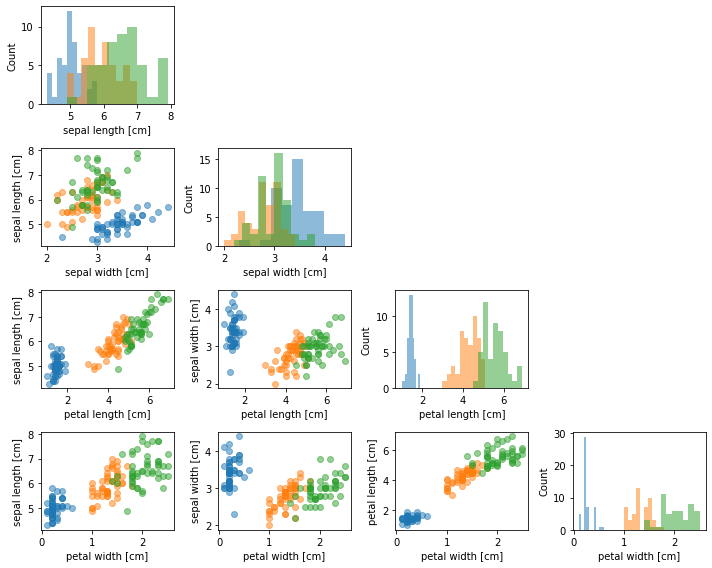

In [16]:
from mlxtend.plotting import scatterplotmatrix


names = ['sepal length [cm]', 'sepal width [cm]',
         'petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(iris.data[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(iris.data[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(iris.data[y==2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.show()

Ancak, yalnızca 2 özellikle çalışıyoruz, yani taç yaprağı uzunluğu ve taç yaprağı genişliği (daha önce `X, y = iris.data[:, 2:], iris.target` aracılığıyla). Aşağıda, "X_train" için bu 2 özelliğin dağılım grafiği matrisi bulunmaktadır:

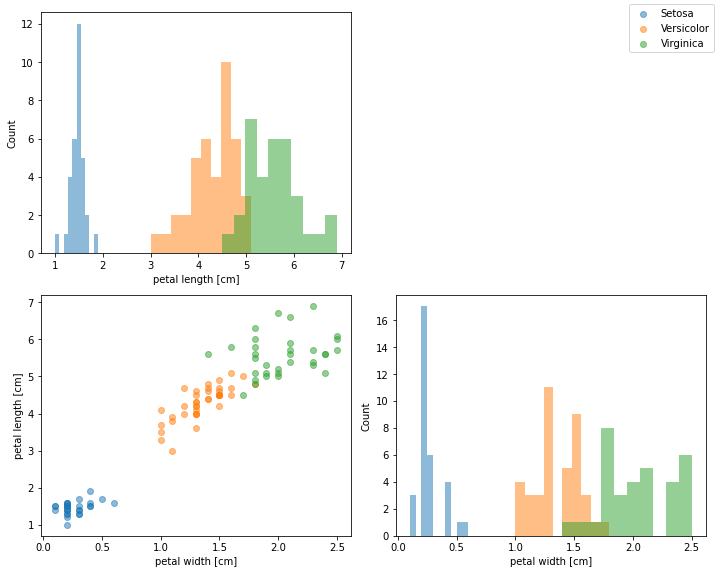

In [17]:
names = ['petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(X_train[y_train==0], figsize=(10, 8), alpha=0.5, label="Setosa")
fig, axes = scatterplotmatrix(X_train[y_train==1], fig_axes=(fig, axes), alpha=0.5, label="Versicolor")
fig, axes = scatterplotmatrix(X_train[y_train==2], fig_axes=(fig, axes), alpha=0.5, names=names, label="Virginica")

fig.legend()

plt.tight_layout()
plt.show()

Bu durumda, dağılım grafiği işlevini kullanmak aşırıya kaçabilir; matplotlib'i doğrudan kullanarak bir dağılım grafiği oluşturabiliriz:

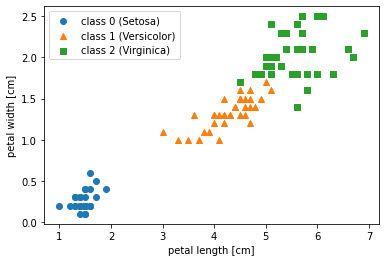

In [18]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()

## 7 - K-NN modelinin Eğitimi 

Daha sonra, scikit-learn'den `KNeighborsClassifier` sınıfını kullanacağız ve `knn_model` dediğimiz yeni bir KNN nesnesini somutlaştıracağız. Ardından, bu modele eğitim veri kümesini "uydururuz":

In [19]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## 8 - KNN Modeli ile Tahminleri Yapmak

KNN modelini "uydurma" işleminden sonra artık modelin daha önce görmediği yeni veri noktaları üzerinde tahminlerde bulunabiliriz. Test seti, bu tür veri noktalarını temsil eder. Elbette, test seti için de etiketlerimiz var, ancak bu etiketleri yalnızca modeli değerlendirmek için kullanıyoruz -- yani, modelin ne kadar iyi olduğunu bulmak için tahminleri test setindeki gerçek etiketlerle karşılaştırıyoruz:

In [20]:
y_pred = knn_model.predict(X_test)

In [21]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

# print('Test set accuracy: %.2f%%' % accuracy)

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 95.56%


In [22]:
# print('Test set accuracy: %.2f%%' % (knn_model.score(X_test, y_test)*100))

print(f'Test set accuracy: {knn_model.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 95.56%


## 9 - Karar Sınırlarını Çizdirme

Genellikle makine öğreniminde 2'den fazla özellik değişkenine sahip veri kümeleriyle çalışırız. Ancak eğitim amaçlı olarak, burada sadece iki özellikten oluşan çok basit bir veri seti seçtik (İris çiçeklerinin taç yaprağı uzunluğu ve taç yaprağı genişliği). Yalnızca iki özelliğimiz varsa, modelin karar sınırlarını kolayca görselleştirebiliriz -- burada MLxtend kitaplığında uyguladığım bir kolaylık işlevini kullanacağız:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


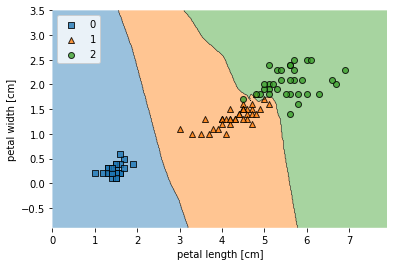

In [23]:
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


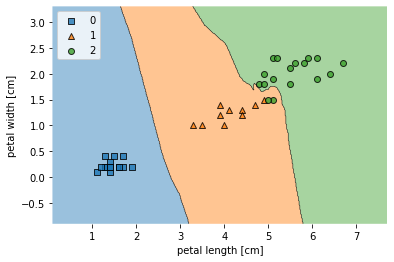

In [24]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()